##### By: Julia Pravato (14615054), Leticia Barbanera Menezes (14588642), Murilo Lima Lirani de Carvalho (11234673)


---




### **Introduction: Method of Least Squares**

In today's increasingly data-driven market landscape, strategic decision-making relies heavily on quantitative methods that can identify patterns and forecast future behavior. A common example arises in the field of digital marketing: when investing in advertising campaigns, businesses seek to understand the relationship between the amount invested and the number of sales generated. Although campaign performance data often exhibits natural fluctuations—due to seasonality, target audience, and advertising channels—a general trend between investment and return typically emerges.

This observation highlights the need to construct a model that captures this relationship, even in the presence of noise and variability. The **Method of Least Squares (MLS)** provides a mathematically sound approach to this problem, allowing for the adjustment of a function (typically linear) that best represents the trend between two variables.

Through MLS, one can estimate an equation that predicts expected outcomes based on different levels of investment. This contributes not only to retrospective analysis, but also to **forecasting, budget optimization, and the strategic planning of more effective marketing efforts**.

This work explores the foundations of MLS from a linear algebra perspective, presenting the classical formulation and discussing its real-world applications, as exemplified above. It aims to demonstrate how mathematical techniques can transform raw data into actionable and valuable insights.


### **Mathematical Formulation**

The **Least Squares Method (LSM)** is a mathematical technique aimed at finding the best possible approximation for an overdetermined linear system — that is, a system with more equations than variables and no exact solution.

To achieve this, we define the **residuals** as the difference between the approximated results and the expected outcomes. In this context, LSM seeks to **minimize the sum of the squared residuals**, finding the set of variable values that minimizes this total.

To perform the method, we compute the matrix $Q \in \mathbb{R}^{n \times n}$, where:

$q(i,j) = \langle g(i), g(j) \rangle$

This can be rewritten as:

$Q = A A^T$

where $A$ is the matrix whose rows are the vectors $g(i)$.

Thus, the system to be solved for the least squares minimization becomes:

$Qx = S$

where the elements of $S \in \mathbb{R}^{n \times 1}$, denoted $S_i$, are given by:

$S_i = \langle F, g(i) \rangle$

and therefore:

$S = A^T y$

The solution to the least squares problem is then expressed as:

$X = (A^T A)^{-1} A^T L$

We now introduce a technique known as **Least Squares Adjustment (LSA)**. This technique involves the adjustment of parameters to **minimize the squared error** resulting from **redundant and conflicting measurements** — that is, from systems that are inconsistent due to having more equations than unknowns.

## **Aplications**

In [ ]:
# Bibliotecas necessárias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
import sklearn.metrics as skm
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### **Didactic Example**


Consider a bar split into three pieces: $x_1$, $x_2$, and $x_3$.

When performing measurements on this bar, it is possible to measure each section individually, or measure multiple sections at once — introducing **redundancy** into the system.

In this example, the bar was measured multiple times. However, due to variations in measurement precision, the recorded values are **not mutually consistent**. That is, discrepancies arise between the results, making it impossible to satisfy all measurements simultaneously within a conventional linear system.

This scenario is a typical case where **Least Squares Adjustment** becomes essential: it enables the reconciliation of conflicting measurements by finding the parameter values ($x_1$, $x_2$, $x_3$) that best approximate all observations, in the sense of minimizing the total squared error.


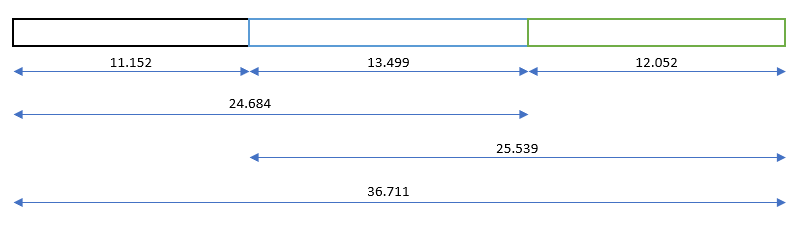



$\begin{cases}
x1 \hspace{2.4cm}     = 11.152\\
x2 \hspace{2.4cm}     = 13.499\\
x3 \hspace{2.4cm}     = 12.052\\
x1 + x2 \hspace{1.2cm}= 24.684\\
x2 + x3 \hspace{1.2cm}= 25.539\\
x1 + x2 + x3 = 36.711\\
\end{cases}
$

In [ ]:
# Criação de dados de teste simples para essa aplicação usada como exemplo
df = [[1, 0, 0, 11.152], [0, 1, 0, 13.499], [0, 0, 1, 12.052], [1, 1, 0, 24.684], [0, 1, 1, 25.539], [1, 1, 1, 36.711]]
df = pd.DataFrame(df)

# Definição das colunas:
df.columns = ["x1","x2","x3","len"]
df

x1  x2  x3     len
0   1   0   0  11.152
1   0   1   0  13.499
2   0   0   1  12.052
3   1   1   0  24.684
4   0   1   1  25.539
5   1   1   1  36.711

In [ ]:
A = df[["x1","x2","x3"]]
A

x1  x2  x3
0   1   0   0
1   0   1   0
2   0   0   1
3   1   1   0
4   0   1   1
5   1   1   1

In [ ]:
L = df[["len"]]
L

len
0  11.152
1  13.499
2  12.052
3  24.684
4  25.539
5  36.711

In general, the problem lies in the fact that there is no vector $\vec{x}$
that exactly satisfies all equations. Therefore, we seek one that minimizes the sum of the squared residuals:

$\min \sum (A\vec{x} - \vec{b})^2$

Representation of the bar example:


$$
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 1 \\
\end{bmatrix}
* \begin{bmatrix}
x1 \\
x2 \\
x3 \\
\end{bmatrix}
= \begin{bmatrix}
11.152 \\
13.499 \\
12.052 \\
24.684 \\
25.539 \\
36.711
\end{bmatrix}
$$

Agora, performa a regressão linear MMQ.
 * $A$: matriz original
 * $L$: vetor de valores observados
 * $np.linalg.inv$: função da biblioteca do NumPy que computa a matriz inversa (multiplicativa) do argumento, uma matriz quadrada não singular. Essa inversa é tratada como aquela que multiplica a matriz otriginal e resulta na matriz de identidade.

Calcula-se os coeficientes $X$ para o modelo de regressão linear usando $X = (A^TA)^{-1}A^TL$












In [ ]:
# Redefinindo os pontos de menor erro quadrático dado a regressão linear
X = np.linalg.inv((A.T)@A)@A.T@L
X

len
0  11.16525
1  13.50425
2  12.04275

Unlike the search for optimal values of $X$ in linear regression using the standard equation, we have:

* `np.linalg.pinv()` — which computes the **pseudoinverse** of a matrix.  
  This can be defined even for non-square matrices or those not classified as full-rank.

In summary, it computes the matrix pseudoinverse using the singular values from the **Singular Value Decomposition (SVD)**.


In [ ]:
# Ou simplismente
X = np.linalg.pinv(A)@L
X

len
0  11.16525
1  13.50425
2  12.04275

The bars in the system, in order to minimize the error according to the Least Squares Method, should have the following measurements.


$\hspace{2cm}$
$\begin{cases}
x1 = 11.16525\\
x2 = 13.50425\\
x3 = 12.04275
\end{cases}
$

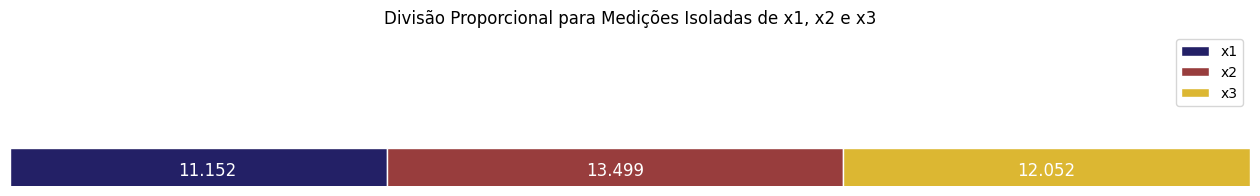

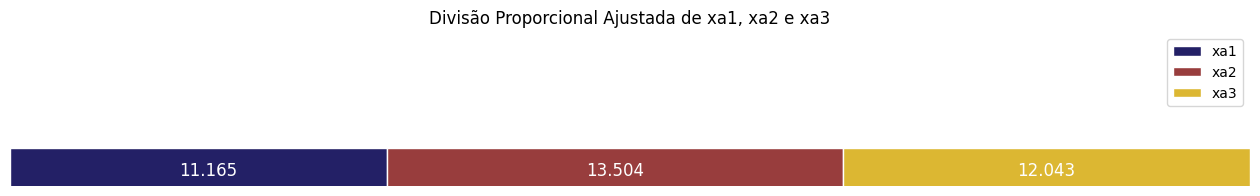

In [ ]:
# Valores de cada uma das barras
x1 = float(L.iloc[0])
x2 = float(L.iloc[1])
x3 = float(L.iloc[2])

# Para a plotagem, deve calcular a soma total e a proporção de cada uma delas
total = x1 + x2 + x3
percentage_x1 = (x1 / total) * 100
percentage_x2 = (x2 / total) * 100
percentage_x3 = (x3 / total) * 100

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(16, 2))

# Seções retangulares
ax.barh(0, percentage_x1, color='#232066', height=0.5, edgecolor='white', label='x1')
ax.barh(0, percentage_x2, left=percentage_x1, color='#983D3D', height=0.5, edgecolor='white', label='x2')
ax.barh(0, percentage_x3, left=percentage_x1 + percentage_x2, color='#DCB732', height=0.5, edgecolor='white', label='x3')

# Rótulos amostra
ax.text(x1 / 0.7, 0.1, f'{x1}', ha='center', va='center', color='white', fontsize=12)
ax.text(percentage_x1 + percentage_x2 / 2, 0.1, f'{x2}', ha='center', va='center', color='white', fontsize=12)
ax.text(percentage_x1 + percentage_x2 + percentage_x3 / 2, 0.1, f'{x3}', ha='center', va='center', color='white', fontsize=12)

# Configurações adicionais
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
ax.axis('off')  # Desativa os eixos
ax.legend() # Adiciona a legenda

# Exibe o gráfico
plt.title('Divisão Proporcional para Medições Isoladas de x1, x2 e x3')
plt.show()

# Valores de cada uma das barras
xa1 = float(X.iloc[0])
xa2 = float(X.iloc[1])
xa3 = float(X.iloc[2])

# Para a plotagem, deve calcular a soma total e a proporção de cada uma delas
totala = xa1 + xa2 + xa3
percentage_xa1 = (xa1 / totala) * 100
percentage_xa2 = (xa2 / totala) * 100
percentage_xa3 = (xa3 / totala) * 100

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(16, 2))

# Seções retangulares
ax.barh(0, percentage_xa1, color='#232066', height=0.5, edgecolor='white', label='xa1')
ax.barh(0, percentage_xa2, left=percentage_xa1, color='#983D3D', height=0.5, edgecolor='white', label='xa2')
ax.barh(0, percentage_xa3, left=percentage_xa1 + percentage_xa2, color='#DCB732', height=0.5, edgecolor='white', label='xa3')

# Rótulos amostra
ax.text(xa1 / 0.7, 0.1, f'{xa1:.3f}', ha='center', va='center', color='white', fontsize=12)
ax.text(percentage_xa1 + percentage_xa2 / 2, 0.1, f'{xa2:.3f}', ha='center', va='center', color='white', fontsize=12)
ax.text(percentage_xa1 + percentage_xa2 + percentage_xa3 / 2, 0.1, f'{xa3:.3f}', ha='center', va='center', color='white', fontsize=12)

# Configurações adicionais
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
ax.axis('off')  # Desativa os eixos
ax.legend() # Adiciona a legenda

# Exibe o gráfico
plt.title('Divisão Proporcional Ajustada de xa1, xa2 e xa3')
plt.show()


RMSE (Root Mean Square Error)

The formula for RMSE is given by:

$RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \widehat{y_i})^2}{n}}$

- $n$: total number of observations  
- $y_i$: observed value  
- $\widehat{y_i}$: predicted value

By taking the square root of the mean of the squared differences between observed and predicted values, we obtain the RMSE. A **lower RMSE** indicates **better model performance**, with predictions that are more accurate when compared to the actual values.


In [ ]:
# Cálculo RMSE: raiz do erro quadrático médio

# inicial
X0 = L.iloc[0:3].copy()

# ajustado
X = X.copy()

# Erro inicial
E0 = round((((L["len"] - np.matmul(A, X0["len"]))**2).sum()/len(L))**0.5,5)
print("RMSE inicial: ", E0, "cm")

# Erro após ajuste
E = round((((L["len"] - np.matmul(A, X["len"]))**2).sum()/len(L))**0.5,5)
print("RMSE após ajuste: ", E, "cm")

RMSE inicial:  0.0147 cm
RMSE após ajuste:  0.0097 cm


As we can see, the error diminished significantly after applying the technique. This shows the importance of LSM!

### **Theoretical Example**

Linear Approximation Method (Modeling) of Nonlinear Systems

Let us consider a function $y(x)$. According to the concepts from calculus, we can **fit** — or more precisely, **approximate** — the curve described by this function by using a combination of characteristic basis functions (polynomial, trigonometric, etc.), such that: $y(x) = f(x; c_1, c_2, \dots, c_n)$

This approach allows for the **linear modeling of nonlinear systems**, by expressing the function as a combination of other, well-known functions with adjustable coefficients.

This can be done by iteratively minimizing the sum of squared residuals between the target function, $y(x)$, and its approzimation, via a **residual parameter** is introduced and developed to quantify the discrepancy.

$residual_i = y_i - f(x_i; c_1, c_2, ..., c_n)\\
f(x_i; c_1', c_2', ..., c_n') = f(x_i; c_1, c_2, ..., c_n) + \frac{\partial f}{\partial c_1}(c_1' - c_1) + \frac{\partial f}{\partial c_2}(c_2' - c_2) + ... + \frac{\partial f}{\partial c_n}(c_n' - c_n)$

$\min \sum_{i=1}^{n} [y_i - f(x_i, \theta)]^2$

- $n$: number of observations  
- $y_i$: observed value  
- $f(x_i, \theta)$: nonlinear function that depends on the parameters $\theta$ and models the relationship between the independent variables $x_i$ and the dependent variables $y_i$

The parameters $\theta$ are adjusted **iteratively** in order to minimize the sum of squared residuals.


Computationally, that's the algorithm we will be executing:

Until a stopping condition is met - moment we consider convergence has been reach:

$\hspace{1cm}$ $I)$ until a maximum number of iterations is reached; *or*

$\hspace{0.75cm}$ $II)$ until all components of the adjustment vector are smaller (in absolute value) than a predefined threshold (th); *or*

$\hspace{0.5cm}$ $III)$ until the error exceeds a maximum allowable limit;



In [ ]:
# Leitura do arquivo CSV com dados e transformação em um DataFrame do pandas
df2 = pd.read_csv("https://raw.githubusercontent.com/MuriloLirani/AlgLin/main/TopoAdj1.csv", sep =";").drop("index", axis=1)
df2 = pd.DataFrame(df2)
df2

x      y      dist       angle
0  10.21  14.27  6.572702   47.594559
1  19.42  13.74  7.473333  133.552497
2  12.98  24.23  5.712152  -73.718956
3  10.87  12.13  7.893678   62.241670
4  16.24  20.67  2.472095  224.866649

In [ ]:
# Cria duas novas colunas ao df2: decomposição da componente 'dist' conforme o angulo projetando na vertical e horizontal
# determinar as variações nos eixos X e Y, o que nos pertmite obter um novo ponto do tipo (x + deltaX, y + deltaY)

df2["x_t"] = df2.x + df2.dist * df2.angle.apply(lambda k: m.cos(k/180*m.pi))
df2["y_t"] = df2.y + df2.dist * df2.angle.apply(lambda k: m.sin(k/180*m.pi))
df2

x      y      dist       angle        x_t        y_t
0  10.21  14.27  6.572702   47.594559  14.642450  19.123226
1  19.42  13.74  7.473333  133.552497  14.270732  19.156249
2  12.98  24.23  5.712152  -73.718956  14.581397  18.746917
3  10.87  12.13  7.893678   62.241670  14.546427  19.115273
4  16.24  20.67  2.472095  224.866649  14.487901  18.926038

In [ ]:
# Lista de cores para plotagem
colors = ['red', 'orange', 'green', 'blue', 'purple', 'black']

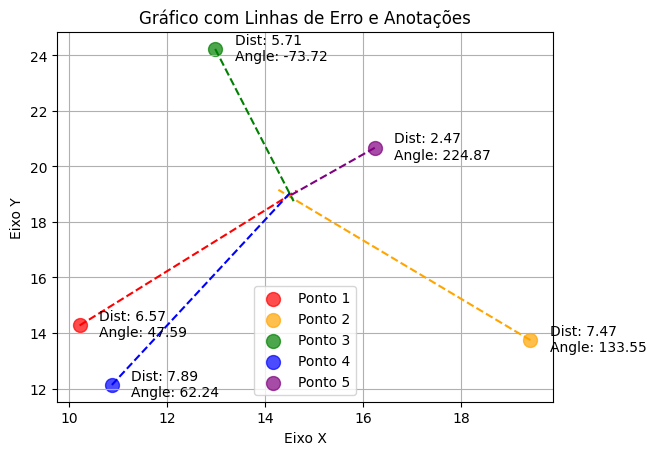

In [ ]:
# Criando o gráfico com os dados fornecidos: plotar os pontos no formato (x, y)
fig, ax = plt.subplots()
plt.ioff()
for i in range(len(df2['x'])):
    ax.scatter(df2['x'][i], df2['y'][i], c=colors[i], s=100, alpha=0.7, label=f'Ponto {i+1}')

# Representação das linhas de distância['dist'] conforme o ângulo['angle'] na dispersão dos pontos em df2
for i in range(len(df2['x'])):
    ax.plot([df2['x'][i], df2['x_t'][i]], [df2['y'][i], df2['y_t'][i]], '--', c = colors[i])

# Adiciona legendas de distância e angulo
for i in range(len(df2['x'])):
    ax.annotate(f'Dist: {df2["dist"][i]:.2f}\nAngle: {df2["angle"][i]:.2f}',
                xy=(df2['x_t'][i], df2['y_t'][i]), xytext=(df2['x'][i] + 0.4, df2['y'][i] - 0.4))

# Exibição final do gráfico
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico com Linhas de Erro e Anotações')
plt.legend(loc='lower center')
plt.grid(True)
plt.show()

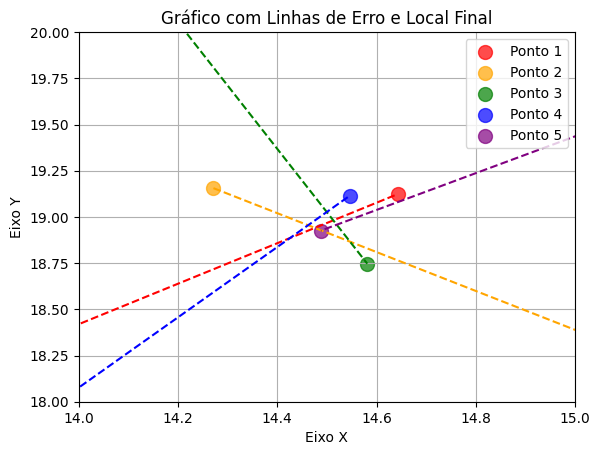

In [ ]:
# Criando o gráfico com os dados fornecidos: plotar os pontos no formato (x, y)
fig, ax = plt.subplots()
for i in range(len(df2['x'])):
    ax.scatter(df2['x_t'][i], df2['y_t'][i], c=colors[i], s=100, alpha=0.7, label=f'Ponto {i+1}')

# Representação das linhas de distância['dist'] conforme o ângulo['angle'] do ponto original
for i in range(len(df2['x'])):
    ax.plot([df2['x'][i], df2['x_t'][i]], [df2['y'][i], df2['y_t'][i]], '--', c = colors[i])

# Exibição final do gráfico
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico com Linhas de Erro e Local Final')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.xlim(14, 15)
plt.ylim(18, 20)

# Exibindo o gráfico
plt.show()

##### **Leat Squares Approximation (LSA)**

$dist = \sqrt{(x - x_0)^2 + (y - y_0)^2}$

$\frac{\partial dist}{\partial x} = \frac{x - x_0}{\sqrt{(x - x_0)^2 + (y - y_0)^2}}$

$\frac{\partial dist}{\partial y} = \frac{y - y_0}{\sqrt{(x - x_0)^2 + (y - y_0)^2}}$



In [ ]:
# Chute inicial:
X0 = pd.DataFrame([14, 19])
X0.index = ["x_t","y_t"]
X0 = X0[0]
X0

x_t    14
y_t    19
Name: 0, dtype: int64

In [ ]:
# Cria-se nova coluna ao df2, indicando os resíduos (em distâncias):
df2["res_dist"] = df2.apply(lambda k: m.dist([k.x_t, k.y_t],[X0.x_t, X0.y_t]), axis = 1)
df2

x      y      dist       angle        x_t        y_t  res_dist
0  10.21  14.27  6.572702   47.594559  14.642450  19.123226  0.654161
1  19.42  13.74  7.473333  133.552497  14.270732  19.156249  0.312585
2  12.98  24.23  5.712152  -73.718956  14.581397  18.746917  0.634093
3  10.87  12.13  7.893678   62.241670  14.546427  19.115273  0.558453
4  16.24  20.67  2.472095  224.866649  14.487901  18.926038  0.493475

In [ ]:
# Resíduos e RMSE atual (Root Mean Squared Error (Erro Quadrático Médio))
L = df2["res_dist"]
print(L,"\n")
print("RMSE atual:", ((df2["res_dist"]**2).sum()/len(df2))**0.5)

0    0.654161
1    0.312585
2    0.634093
3    0.558453
4    0.493475
Name: res_dist, dtype: float64 

RMSE atual: 0.5446277402715931


In [ ]:
# Funções: aplicam a fórmula apresentada para o LSA, derivadas de 'dist' em relação a x e y
def dDist_dx(x, y, x0, y0):
    if x == x0:
        return 0
    return 1/(m.sqrt((x - x0) ** 2 + (y - y0) ** 2)) * (x - x0)

def dDist_dy(x, y, x0, y0):
    if y == y0:
        return 0
    return 1/(m.sqrt((x - x0) ** 2 + (y - y0) ** 2)) * (y - y0)

In [ ]:
# Derivadas em relação ao ponto X0
A = df2.copy()
A["x"] = df2[["x_t","y_t"]].apply(lambda k: dDist_dx(k.x_t, k.y_t, X0.x_t, X0.y_t), axis = 1)
A["y"] = df2[["x_t","y_t"]].apply(lambda k: dDist_dy(k.x_t, k.y_t, X0.x_t, X0.y_t), axis = 1)
A = A[["x","y"]]
A

x         y
0  0.982098  0.188373
1  0.866107  0.499859
2  0.916896 -0.399127
3  0.978465  0.206415
4  0.988704 -0.149880

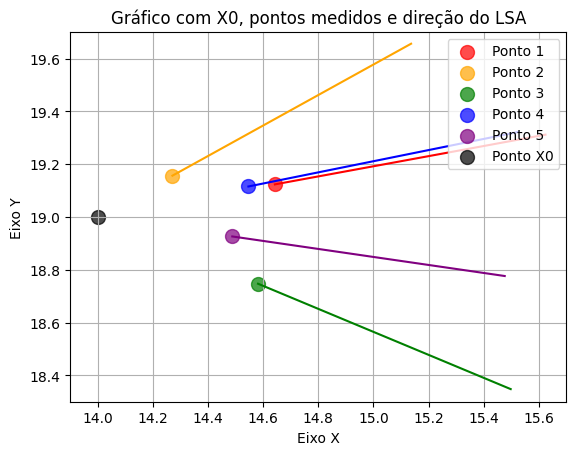

In [ ]:
# Criando o gráfico com os dados fornecidos: plotar os pontos no formato (x, y)
fig, ax = plt.subplots()
for i in range(len(df2['x'])):
    ax.scatter(df2['x_t'][i], df2['y_t'][i], c=colors[i], s=100, alpha=0.7, label=f'Ponto {i+1}')

# Ponto atual X0
ax.scatter(X0[0], X0[1], c='black', s=100, alpha=0.7, label=f'Ponto X0')

# Representação das linhas derivadas em relação ao ponto X0 (vetor gradiente que maximiza)
for i in range(len(df2['x'])):
    ax.plot([df2['x_t'][i], (df2['x_t'][i] + A['x'][i])], [df2['y_t'][i], df2['y_t'][i] + A['y'][i]], '-', c = colors[i])

# Exibição final do gráfico
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico com X0, pontos medidos e direção do LSA')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.xlim(13.9, 15.7)
plt.ylim(18.3, 19.7)

# Exibindo o gráfico
plt.show()

In [ ]:
# Ajuste: sentido do passo para minimizar o erro no ponto X0
ajt = np.linalg.pinv(A)@L
ajt

array([ 0.57774965, -0.21374358])

In [ ]:
# Atualiza a posição
X = X0 + ajt
X

x_t    14.577750
y_t    18.786256
Name: 0, dtype: float64

In [ ]:
# Resíduos e erro atual: Atualização dos resíduos após ajuste
df2["res_dist"] = df2.apply(lambda k: m.dist([k.x_t, k.y_t],[X.x_t, X.y_t]), axis = 1)
L = df2["res_dist"]
print(L,"\n")
print("RMSE atual:", ((df2["res_dist"]**2).sum()/len(df2))**0.5)

0    0.343125
1    0.480785
2    0.039509
3    0.330504
4    0.166167
Name: res_dist, dtype: float64 

RMSE atual: 0.3121839039530402


$\alpha = 1.0$

In [ ]:
# Todo o processo descrito anteriormente como individual é replicado por completo, mas agora uma abordagem iterativa
df2 = pd.read_csv("https://raw.githubusercontent.com/MuriloLirani/AlgLin/main/TopoAdj1.csv", sep =";").drop("index", axis=1)
df2 = pd.DataFrame(df2)
df2["x_t"] = df2.x + df2.dist * df2.angle.apply(lambda k: m.cos(k/180*m.pi))
df2["y_t"] = df2.y + df2.dist * df2.angle.apply(lambda k: m.sin(k/180*m.pi))
X = pd.DataFrame([14,19])
X.index = ["x_t","y_t"]
X = X[0]
th = 10**(-5)
alfa = 1 # hiperparametro
errors_rate = []
location = []

for i in range(20):
    df2["dist_t"] = df2.apply(lambda k: m.dist([k.x_t, k.y_t],[X.x_t, X.y_t]), axis = 1)
    L = df2["dist_t"]
    A = df2.copy()
    A["x"] = df2[["x_t","y_t"]].apply(lambda k: dDist_dx(k.x_t, k.y_t, X.x_t, X.y_t), axis = 1)
    A["y"] = df2[["x_t","y_t"]].apply(lambda k: dDist_dy(k.x_t, k.y_t, X.x_t, X.y_t), axis = 1)
    A = A[["x","y"]]
    ajt = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T, A)),A.T),L)
    ajt.index = ["x_t","y_t"]
    error = 0
    for l in L:
        error += l**2
    print("Iteração", "{:02d}".format(i), "   RMSE:","{:.6f}".format(m.sqrt(error/len(L))))
    errors_rate.append(m.sqrt(error/len(L)))
    if abs(ajt.loc["x_t"]) < th and abs(ajt.loc["y_t"] < th):
        break
    X = X + ajt * alfa
    location.append(X)
location = pd.DataFrame(location)
print("\n")
print("Iteração", "{:02d}".format(i), "   RMSE:","{:.6f}".format(m.sqrt(error/len(L))))
print("\n")
print(X)

Iteração 00    RMSE: 0.544628
Iteração 01    RMSE: 0.312184
Iteração 02    RMSE: 0.236802
Iteração 03    RMSE: 0.239951
Iteração 04    RMSE: 0.218979
Iteração 05    RMSE: 0.237767
Iteração 06    RMSE: 0.219704
Iteração 07    RMSE: 0.238247
Iteração 08    RMSE: 0.219078
Iteração 09    RMSE: 0.238030
Iteração 10    RMSE: 0.219225
Iteração 11    RMSE: 0.238095
Iteração 12    RMSE: 0.219165
Iteração 13    RMSE: 0.238072
Iteração 14    RMSE: 0.219182
Iteração 15    RMSE: 0.238079
Iteração 16    RMSE: 0.219176
Iteração 17    RMSE: 0.238077
Iteração 18    RMSE: 0.219178
Iteração 19    RMSE: 0.238077


Iteração 19    RMSE: 0.238077


x_t    14.430837
y_t    18.971104
dtype: float64


In [ ]:
# Inicializando a animação
fig, ax = plt.subplots()
plt.ioff()
x_vals = list(range(1, len(errors_rate)+1))
y_vals = []

# Função para disposição de cada frame
def update(frame):
    y_vals.append(errors_rate[frame])
    ax.clear()
    ax.plot(x_vals[1:frame+1], y_vals[1:frame+1], marker='o', c = 'r') # Adiciona ponto a ponto no frame

    ax.set_xlabel('Iteração') # Configurações de exibição
    ax.set_ylabel('Taxa de Erro')
    ax.set_title(f'Erro ao longo das iterações (RMSE)')
    ax.grid(True)

    plt.xlim(0, 21) # Restrições de foco dos eixos
    plt.ylim(0.1, 0.6)
    plt.xticks(np.linspace(0, 20, 11))

# Criando a animação
ani = animation.FuncAnimation(fig, update, frames=len(errors_rate), repeat=False)
HTML(ani.to_jshtml())


In [ ]:
# Inicializando a animação
fig, ax = plt.subplots()
plt.ioff()
x_loc = []
y_loc = []

# Função para disposição de cada frame
def update(frame):
    x_loc.append(location['x_t'][frame])
    y_loc.append(location['y_t'][frame])
    ax.clear()

    # Plotando os pontos originais df2
    for i in range(len(df2['x'])):
        plt.scatter(df2['x_t'][i], df2['y_t'][i], c=colors[i], s=100, alpha=0.7, label=f'Ponto {i+1}')

    # Plotando os pontos x_t e y_t à medida que aparecem
    ax.plot(x_loc, y_loc, marker='o', linestyle='-', color='black')

    ax.set_xlabel('X_t') # Configurações de exibição
    ax.set_ylabel('Y_t')
    ax.set_title(f'Movimento dos Pontos X_t e Y_t')
    ax.grid(True)

# Criando a animação
ani = animation.FuncAnimation(fig, update, frames=len(location), repeat=False)
HTML(ani.to_jshtml())

$\alpha = 0.1$

In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/MuriloLirani/AlgLin/main/TopoAdj1.csv", sep =";").drop("index", axis=1)
df2 = pd.DataFrame(df2)
df2["x_t"] = df2.x + df2.dist * df2.angle.apply(lambda k: m.cos(k/180*m.pi))
df2["y_t"] = df2.y + df2.dist * df2.angle.apply(lambda k: m.sin(k/180*m.pi))
X = pd.DataFrame([14,19])
X.index = ["x_t","y_t"]
X = X[0]
th = 10**(-5)
alfa = 0.1 # hiperparametro
errors_rate = []
location = []

for i in range(100):
    df2["dist_t"] = df2.apply(lambda k: m.dist([k.x_t, k.y_t],[X.x_t, X.y_t]), axis = 1)
    L = df2["dist_t"]
    A = df2.copy()
    A["x"] = df2[["x_t","y_t"]].apply(lambda k: dDist_dx(k.x_t, k.y_t, X.x_t, X.y_t), axis = 1)
    A["y"] = df2[["x_t","y_t"]].apply(lambda k: dDist_dy(k.x_t, k.y_t, X.x_t, X.y_t), axis = 1)
    A = A[["x","y"]]
    ajt = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T, A)),A.T),L)
    ajt.index = ["x_t","y_t"]
    error = 0
    for l in L:
        error += l**2
    print("Iteração", "{:02d}".format(i), "   RMSE:","{:.6f}".format(m.sqrt(error/len(L))))
    errors_rate.append(m.sqrt(error/len(L)))
    if abs(ajt.loc["x_t"]) < th and abs(ajt.loc["y_t"] < th):
        break
    X = X + ajt * alfa
    location.append(X)
location = pd.DataFrame(location)
print("\n")
print("Iteração", "{:02d}".format(i), "   RMSE:","{:.6f}".format(m.sqrt(error/len(L))))
print("\n")
print(X)

Iteração 00    RMSE: 0.544628
Iteração 01    RMSE: 0.492494
Iteração 02    RMSE: 0.445304
Iteração 03    RMSE: 0.402713
Iteração 04    RMSE: 0.364468
Iteração 05    RMSE: 0.330432
Iteração 06    RMSE: 0.300610
Iteração 07    RMSE: 0.275162
Iteração 08    RMSE: 0.254337
Iteração 09    RMSE: 0.238262
Iteração 10    RMSE: 0.226590
Iteração 11    RMSE: 0.218416
Iteração 12    RMSE: 0.212720
Iteração 13    RMSE: 0.208750
Iteração 14    RMSE: 0.206022
Iteração 15    RMSE: 0.204208
Iteração 16    RMSE: 0.203057
Iteração 17    RMSE: 0.202367
Iteração 18    RMSE: 0.201976
Iteração 19    RMSE: 0.201765
Iteração 20    RMSE: 0.201657
Iteração 21    RMSE: 0.201602
Iteração 22    RMSE: 0.201575
Iteração 23    RMSE: 0.201562
Iteração 24    RMSE: 0.201555
Iteração 25    RMSE: 0.201552
Iteração 26    RMSE: 0.201550
Iteração 27    RMSE: 0.201549
Iteração 28    RMSE: 0.201548
Iteração 29    RMSE: 0.201548
Iteração 30    RMSE: 0.201548
Iteração 31    RMSE: 0.201548
Iteração 32    RMSE: 0.201548
Iteração 3

In [ ]:
# Inicializando a animação
fig, ax = plt.subplots()
plt.ioff()
x_vals = list(range(1, len(errors_rate)+1))
y_vals = []

# Função para disposição de cada frame
def update(frame):
    y_vals.append(errors_rate[frame])
    ax.clear()
    ax.plot(x_vals[1:frame+1], y_vals[1:frame+1], marker='o', c = 'r') # Adiciona ponto a ponto no frame

    ax.set_xlabel('Iteração') # Configurações de exibição
    ax.set_ylabel('Taxa de Erro')
    ax.set_title(f'Erro ao longo das iterações (RMSE)')
    ax.grid(True)

    plt.xlim(0, 38) # Restrições de foco dos eixos
    plt.ylim(0.1, 0.6)
    plt.xticks(np.linspace(0, 36, 10))

# Criando a animação
ani = animation.FuncAnimation(fig, update, frames=len(errors_rate), repeat=False)
HTML(ani.to_jshtml())


In [ ]:
# Inicializando a animação
fig, ax = plt.subplots()
plt.ioff()
x_loc = []
y_loc = []

# Função para disposição de cada frame
def update(frame):
    x_loc.append(location['x_t'][frame])
    y_loc.append(location['y_t'][frame])
    ax.clear()

    # Plotando os pontos originais df2
    for i in range(len(df2['x'])):
        plt.scatter(df2['x_t'][i], df2['y_t'][i], c=colors[i], s=100, alpha=0.7, label=f'Ponto {i+1}')

    # Plotando os pontos x_t e y_t à medida que aparecem
    ax.plot(x_loc, y_loc, marker='o', linestyle='-', color='black')

    ax.set_xlabel('X_t') # Configurações de exibição
    ax.set_ylabel('Y_t')
    ax.set_title(f'Movimento dos Pontos X_t e Y_t')
    ax.grid(True)

# Criando a animação
ani = animation.FuncAnimation(fig, update, frames=len(location), repeat=False)
HTML(ani.to_jshtml())

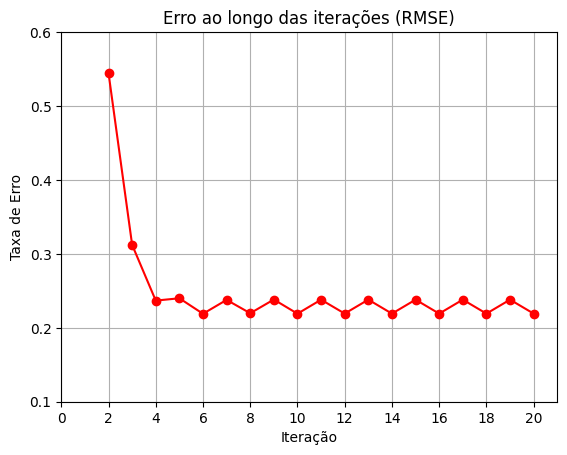

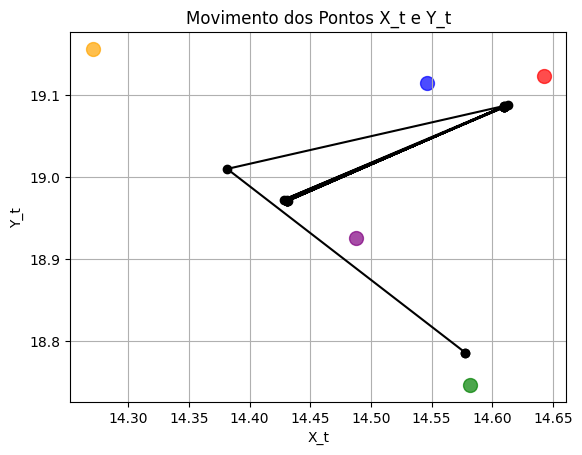

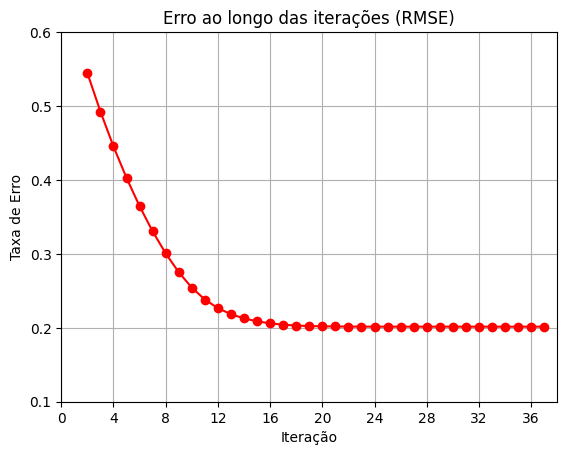

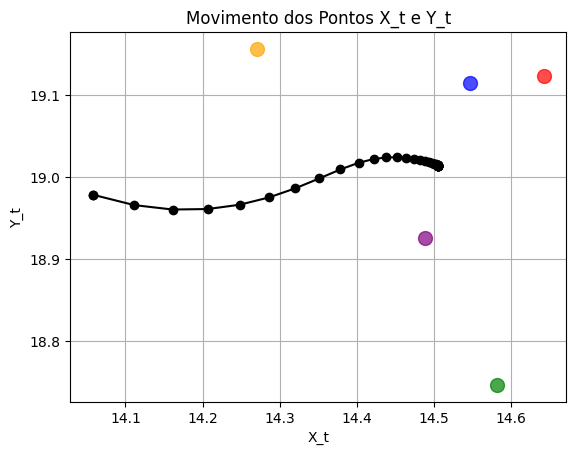

In [ ]:
#Resultados finais
plt.show()

### **Practical Example**

The bacterial growth curve is a well-established model in microbiology, typically characterized by four distinct phases: **Lag**, **Exponential**, **Stationary**, and **Death**. Each phase represents a different dynamic in the growth behavior of a bacterial population over time.

To understand and predict bacterial growth quantitatively, it is common to collect experimental data at various time points. However, due to biological variability and measurement limitations, this data often contains noise and does not follow the theoretical curve exactly.

In this context, we apply the **Least Squares Method (LSM)** to fit a nonlinear growth model — such as the **logistic function** — to the observed data. By minimizing the sum of squared differences between the observed bacterial counts and the values predicted by the model, LSM enables us to estimate the growth parameters (e.g., carrying capacity, growth rate, inflection point) that best represent the real behavior of the system.

This approach provides not only a smoother and more interpretable representation of bacterial development but also allows for **forecasting**, **comparative analysis**, and **parameter optimization** in biological and biotechnological applications.


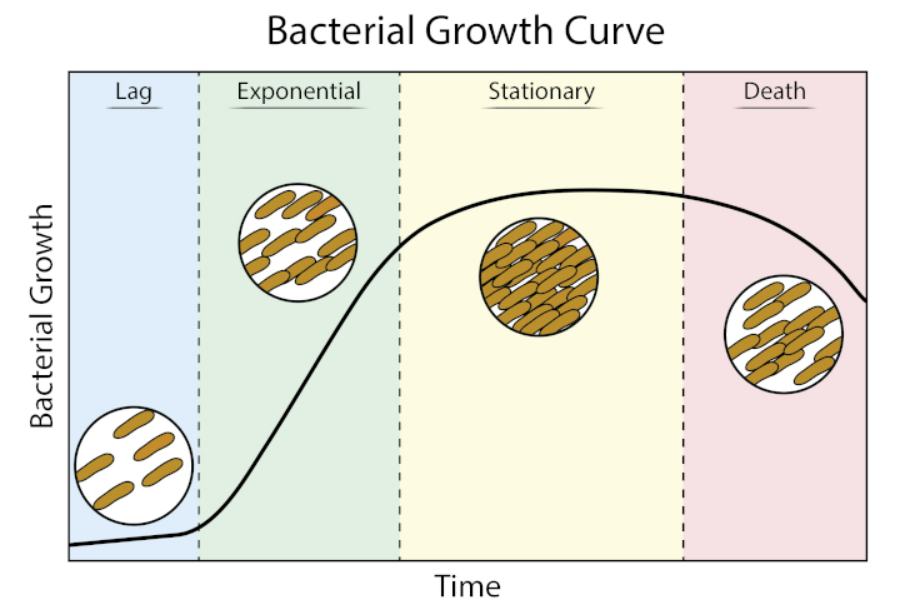

Curve Equation: $E(t) = a \;e^{bt}$

In [ ]:
df3 = pd.read_csv("https://raw.githubusercontent.com/MuriloLirani/AlgLin/main/UFC.csv", sep =";")
df3.columns = ["t","E"]
df3.head()

t   E
0  0.0  32
1  0.5  32
2  1.0  31
3  1.5  36
4  2.0  39

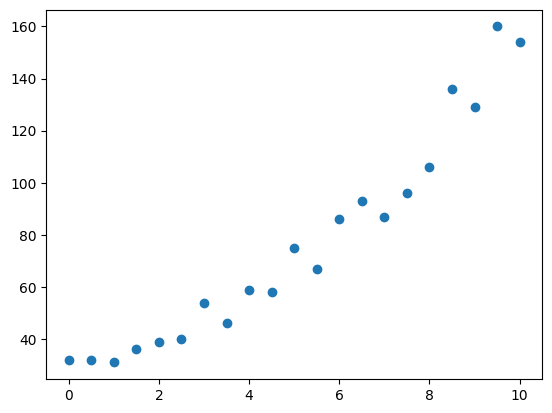

In [ ]:
plt.scatter(df3['t'], df3['E'])
plt.show()

In [ ]:
def dExp_a(a, b, x):
    return np.exp(b*x)

def dExp_b(a, b, x):
    return a*x*np.exp(b*x)

In [ ]:
def LSA_df3(a, b, th=10**(-4), alfa=0.1, it_lim=300, error_lim=10**(8), silence=False):

    df3 = pd.read_csv("https://raw.githubusercontent.com/MuriloLirani/AlgLin/main/UFC.csv", sep =";")
    df3.columns = ["t","E"]

    X = pd.DataFrame([a,b])
    X.index = ["a","b"]
    X = X[0]
    errors_rate = []
    location = []

    L0 = df3["E"]

    #erro inicial
    L = L0 - X.a*np.exp(df3["t"]*X.b)
    error = 0
    for l in L:
        error += l**2

    for i in range(it_lim):
        L = L0 - X.a*np.exp(df3["t"]*X.b)
        A = pd.DataFrame([])
        A["a"] = df3["t"].apply(lambda t: dExp_a(X.a, X.b, t))
        A["b"] = df3["t"].apply(lambda t: dExp_b(X.a, X.b, t))
        ajt = np.linalg.pinv(A)@L
        ajt = pd.DataFrame(ajt)
        ajt.index = ["a","b"]
        ajt = ajt[0]

        error_pre = error
        error = 0
        for l in L:
            error += l**2
        error = m.sqrt(error/len(L))


        if i%10==0 and not silence:
            print("Iteração", "{:03d}".format(i), "   RMSE:","{:.6f}".format(error))
        if error > error_pre:
            alfa /= 2
        errors_rate.append(m.sqrt(error))
        if (abs(ajt.loc["a"]) < th and abs(ajt.loc["b"] < th)):
            break

        if error > error_lim:
            break
        X = X + ajt * alfa
        location.append(X)
    if not silence:
        print("\n")
        print("Iteração", "{:03d}".format(i), "   RMSE:","{:.6f}".format(error))
        print("\n")
        print(X)
    return [X, error, location, errors_rate]

In [ ]:
dens_map3 = []
pixels = 50
a_range = [25, 35]
b_range = [0, 1]

for a in np.linspace(a_range[0], a_range[1], pixels):
    for b in np.linspace(b_range[0], b_range[1], pixels):
        X = pd.DataFrame([a,b])
        X.index = ["a","b"]
        X = X[0]
        dmap = df3[["t","E"]].copy()
        dmap["error"] = (X.a*np.exp(dmap.t*X.b)-dmap.E)**2
        dens_map3.append([a,b,dmap["error"].sum()])

dens_map3 = pd.DataFrame(dens_map3, columns = ["a","b","e"])
dens_map3 = dens_map3.pivot_table(index = "a", columns = "b", values = "e")
dens_map3 = np.log(dens_map3)
dens_map3

b           0.000000   0.020408   0.040816   0.061224   0.081633   0.102041  \
a                                                                             
25.000000  11.410461  11.311164  11.187529  11.031136  10.829143  10.560666   
25.204082  11.405525  11.305168  11.180133  11.021835  10.817144  10.544624   
25.408163  11.400584  11.299162  11.172720  11.012504  10.805090  10.528478   
25.612245  11.395638  11.293147  11.165289  11.003143  10.792981  10.512225   
25.816327  11.390687  11.287122  11.157842  10.993751  10.780816  10.495865   
26.020408  11.385732  11.281089  11.150378  10.984328  10.768595  10.479397   
26.224490  11.380772  11.275046  11.142897  10.974875  10.756318  10.462819   
26.428571  11.375807  11.268994  11.135399  10.965392  10.743985  10.446132   
26.632653  11.370838  11.262933  11.127885  10.955878  10.731595  10.429334   
26.836735  11.365864  11.256862  11.120354  10.946333  10.719148  10.412425   
27.040816  11.360886  11.250783  11.112806  10.936758  10.706644  10.395403   
27.244898  11.355903  11.244695  11.105241  10.927153  10.694083  10.378268   
27.448980  11.350916  11.238598  11.097660  10.917517  10.681464  10.361018   
27.653061  11.345924  11.232492  11.090062  10.907850  10.668788  10.343654   
27.857143  11.340928  11.226378  11.082448  10.898153  10.656054  10.326174   
28.061224  11.335928  11.220255  11.074818  10.888425  10.643262  10.308577   
28.265306  11.330924  11.214123  11.067171  10.878667  10.630413  10.290863   
28.469388  11.325916  11.207983  11.059508  10.868879  10.617505  10.273032   
28.673469  11.320903  11.201835  11.051828  10.859060  10.604539  10.255082   
28.877551  11.315887  11.195678  11.044133  10.849211  10.591515  10.237013   
29.081633  11.310867  11.189512  11.036422  10.839331  10.578432  10.218824   
29.285714  11.305843  11.183339  11.028694  10.829422  10.565291  10.200515   
29.489796  11.300816  11.177157  11.020951  10.819482  10.552092  10.182085   
29.693878  11.295784  11.170968  11.013193  10.809513  10.538834  10.163534   
29.897959  11.290749  11.164770  11.005418  10.799513  10.525518  10.144862   
30.102041  11.285711  11.158565  10.997628  10.789484  10.512143  10.126068   
30.306122  11.280669  11.152352  10.989823  10.779425  10.498710  10.107151   
30.510204  11.275624  11.146131  10.982002  10.769336  10.485219  10.088113   
30.714286  11.270575  11.139903  10.974166  10.759218  10.471669  10.068952   
30.918367  11.265524  11.133668  10.966316  10.749070  10.458061  10.049670   
31.122449  11.260469  11.127425  10.958450  10.738894  10.444396  10.030264   
31.326531  11.255411  11.121174  10.950570  10.728688  10.430672  10.010737   
31.530612  11.250350  11.114917  10.942674  10.718454  10.416891   9.991089   
31.734694  11.245286  11.108653  10.934765  10.708191  10.403053   9.971319   
31.938776  11.240220  11.102381  10.926841  10.697900  10.389158   9.951428   
32.142857  11.235150  11.096103  10.918903  10.687580  10.375206   9.931418   
32.346939  11.230078  11.089818  10.910951  10.677233  10.361198   9.911288   
32.551020  11.225004  11.083527  10.902985  10.666857  10.347134   9.891040   
32.755102  11.219927  11.077230  10.895005  10.656455  10.333014   9.870675   
32.959184  11.214848  11.070926  10.887012  10.646025  10.318839   9.850195   
33.163265  11.209767  11.064615  10.879006  10.635568  10.304610   9.829600   
33.367347  11.204683  11.058299  10.870987  10.625085  10.290327   9.808893   
33.571429  11.199597  11.051977  10.862954  10.614575  10.275990   9.788076   
33.775510  11.194510  11.045650  10.854909  10.604039  10.261601   9.767150   
33.979592  11.189420  11.039316  10.846852  10.593478  10.247159   9.746119   
34.183673  11.184329  11.032978  10.838782  10.582892  10.232667   9.724984   
34.387755  11.179236  11.026634  10.830701  10.572281  10.218124   9.703749   
34.591837  11.174142  11.020285  10.822608  10.561645  10.203532   9.682418   
34.795918  11.169046  11.013930  10.814503  10.550

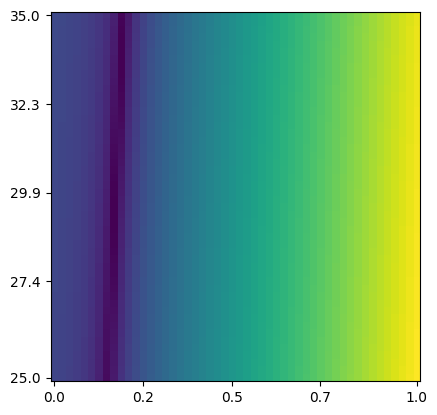

In [ ]:
plt.ioff()
X_pos = np.linspace(0,len(dens_map3.columns)-1,5).astype(int)
Y_pos = np.linspace(0,len(dens_map3.index)-1,5).astype(int)
plt.yticks(Y_pos, reversed([round(dens_map3.index[i], 1) for i in Y_pos]))
plt.xticks(X_pos, [round(dens_map3.columns[i], 1) for i in X_pos])
plt.imshow(dens_map3, cmap='viridis')
plt.show()

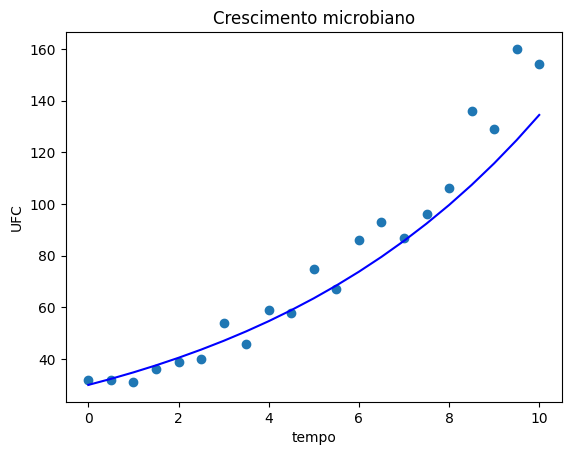

In [ ]:
# Primeiro palpite
a, b = 30, 0.15
df3 = pd.read_csv("https://raw.githubusercontent.com/MuriloLirani/AlgLin/main/UFC.csv", sep =";")
df3.columns = ["t","E"]
df3["E_Ajt"] = a*np.exp(b*df3.t)

x = df3['t']
y = df3['E']
y_line = df3["E_Ajt"]

plt.scatter(x, y, marker='o')
plt.plot(x, y_line, color="blue")
plt.xlabel('tempo')
plt.ylabel('UFC')
plt.title('Crescimento microbiano')
plt.show()

Iteração 000    RMSE: 12.477446
Iteração 010    RMSE: 7.458416
Iteração 020    RMSE: 6.599027
Iteração 030    RMSE: 6.486886
Iteração 040    RMSE: 6.473104
Iteração 050    RMSE: 6.471424
Iteração 060    RMSE: 6.471219
Iteração 070    RMSE: 6.471194
Iteração 080    RMSE: 6.471191
Iteração 090    RMSE: 6.471190


Iteração 094    RMSE: 6.471190


a    28.043742
b     0.174563
Name: 0, dtype: float64


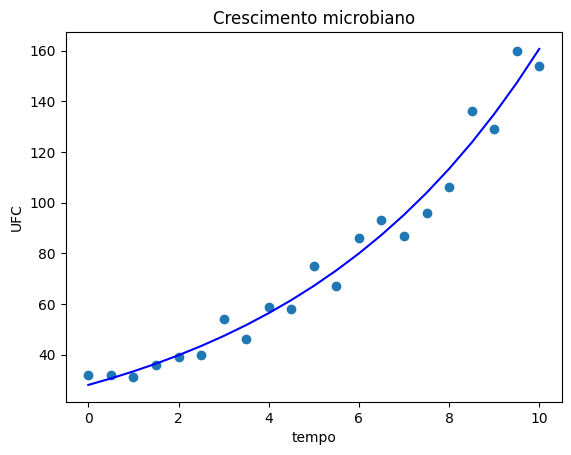

In [ ]:
# escolher (a,b) iniciais:

a, b = 30, 0.15

a, b = LSA_df3(a, b)[0]
df3 = pd.read_csv("https://raw.githubusercontent.com/MuriloLirani/AlgLin/main/UFC.csv", sep =";")
df3.columns = ["t","E"]
df3["Ajt"] = a*np.exp(b*df3.t)

x = df3['t']
y = df3['E']
y_line = df3["Ajt"]

plt.scatter(x, y, marker='o')
plt.plot(x, y_line, color="blue")
plt.xlabel('tempo')
plt.ylabel('UFC')
plt.title('Crescimento microbiano')
plt.show()

In [ ]:
l = pd.DataFrame(LSA_df3(28, 0.15, silence=True)[2])
x = pd.DataFrame()
x['t'] = df3['t']
for i in range(len(l)):
  l1 = l.iloc[i]
  x[i] = l1.a*np.exp(l1.b*x.t)
x = x.set_index('t')

In [ ]:
# Função para animação
fig, ax = plt.subplots()

def update(frame):
    plt.cla()  # Limpa o eixo para o próximo frame
    plt.plot(x.iloc[:, frame], label=f'Iteração {frame}') # Representação da curva atual
    plt.title('Crescimento microbiano')
    plt.xlabel('Tempo')
    plt.ylabel('UFC')
    plt.legend(loc = 'upper left')
    ax.grid(True)
    plt.ylim(20, 170)
    # Plotando os pontos originais df3
    plt.scatter(df3['t'], df3['E'], c = 'orange')

# Configuração da figura
ani = animation.FuncAnimation(fig, update, frames=x.shape[1], repeat=False)
HTML(ani.to_jshtml())


In [ ]:
a_range = [25, 35]
b_range = [0.1, 1.5]
a = np.random.uniform(low=a_range[0], high=a_range[1])
b = np.random.uniform(low=b_range[0], high=b_range[0])
result = LSA_df3(a, b, silence=True)
best_ab = list(result[0])
best_error = result[1]
for i in range(20):
    a = np.random.uniform(low=a_range[0], high=a_range[1])
    b = np.random.uniform(low=b_range[0], high=b_range[1])
    result = LSA_df3(a, b, silence=True)
    print("It:",i,"  a0:", round(a, 5),"  b0:",round(b, 5),"  error: ", round(result[1], 5))
    if  result[1] < best_error:
        best_ab = list(result[0])
        best_error = result[1]
print("\n")
print("Melhor:  a:", round(best_ab[0],5), "b", round(best_ab[1],5), "error", round(best_error, 5))
print("\n")
df3 = pd.read_csv("https://raw.githubusercontent.com/MuriloLirani/AlgLin/main/UFC.csv", sep =";")
df3.columns = ["t","E"]
df3["Ajt"] = best_ab[0]*np.exp(best_ab[1]*df3.t)

x = df3['t']
y = df3['E']
y_line = df3["Ajt"]

It: 0   a0: 30.23855   b0: 0.49448   error:  6.47119
It: 1   a0: 28.37897   b0: 1.46284   error:  1312.4785
It: 2   a0: 30.38339   b0: 0.79117   error:  6.47119
It: 3   a0: 29.19633   b0: 1.30556   error:  6.47119
It: 4   a0: 30.72315   b0: 0.70207   error:  6.47119
It: 5   a0: 28.58066   b0: 1.47492   error:  6.47119
It: 6   a0: 31.12252   b0: 1.23214   error:  6.47119
It: 7   a0: 31.0782   b0: 1.36332   error:  6.47119
It: 8   a0: 27.61226   b0: 1.15829   error:  6.47119
It: 9   a0: 26.42785   b0: 0.90073   error:  6.47119
It: 10   a0: 30.45872   b0: 0.44493   error:  6.47119
It: 11   a0: 27.47737   b0: 1.4313   error:  6.47119
It: 12   a0: 34.38994   b0: 0.67879   error:  6.47119
It: 13   a0: 32.59134   b0: 1.31664   error:  1141.49461
It: 14   a0: 25.60541   b0: 0.30766   error:  6.47119
It: 15   a0: 30.87084   b0: 1.21627   error:  6.47119
It: 16   a0: 25.71934   b0: 0.95741   error:  6.47119
It: 17   a0: 25.81488   b0: 0.59211   error:  6.47119
It: 18   a0: 26.68766   b0: 0.43086

Depending on the initial values, the system may converge to a **local minimum** rather than finding the **global minimum** of the function.


In [ ]:
S = LSA_df3(26.52857, 1.47872)

Iteração 000    RMSE: 17408992.807798
Iteração 010    RMSE: 6070232.401795
Iteração 020    RMSE: 2116651.094347
Iteração 030    RMSE: 738122.484199
Iteração 040    RMSE: 257459.143955
Iteração 050    RMSE: 89861.814733
Iteração 060    RMSE: 31423.142997
Iteração 070    RMSE: 11043.767606
Iteração 080    RMSE: 3929.672121
Iteração 090    RMSE: 1429.188309


Iteração 091    RMSE: 1293.075233


a    0.005380
b    1.380847
Name: 0, dtype: float64


Based on the microbial growth model with fitted parameters:

$a = 28.04355 \quad b = 0.17456$

we can use the model to **predict the population size** 2 hours **before** the start of the experiment, as well as **project** it 2 hours **after** the end, for example.


$E(t) = a\; e^{bt}\\
E(-2) = 28.04355\; e^{0.17456(-2)} = 19.77936\\
E(12)\; = 28.04355\; e^{0.17456(12)}\; = 227.80242
$